In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Problem 1: Creating code to determine the initial values of the weigh
class ScratchSimpleNeuralNetrowkClassifier:
    def __init__(
        self,
        batch_size=20,
        n_features=784,
        n_nodes1=400,
        n_nodes2=200,
        n_output=10,
        sigma=0.02,
        lr=0.01,
        epoch=10,
        verbose=True,
    ):
        self.verbose = verbose
        self.batch_size = batch_size
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch
        self.loss_train = []
        self.loss_val = []

        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.B1 = self.sigma * np.random.randn(self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.B2 = self.sigma * np.random.randn(self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.B3 = self.sigma * np.random.randn(self.n_output)

    # Activation function
    def sigmoid(self, A):
        return 1 / (1 + np.exp(-A))

    def softmax(self, A):
        A = A - np.max(A, axis=1, keepdims=True)
        exp_A = np.exp(A)
        return exp_A / np.sum(exp_A, axis=1, keepdims=True)

#Problem 3 Implementation of Cross-Entropy Error
    def cross_entropy_error(self, y, Z):
        if y.ndim == 2:
            y = np.argmax(y, axis=1)
        batch_size = Z.shape[0]
        return -np.sum(np.log(Z[np.arange(batch_size), y] + 1e-7)) / batch_size

    def accuracy(self, y_pred, y_true):
        return np.mean(y_pred == y_true)

    def one_hot(self, y, n_classes):
        one_hot = np.zeros((y.size, n_classes))
        one_hot[np.arange(y.size), y] = 1
        return one_hot

#Problem 2: Implementation of Forward Propagation
    def forward(self, X):
        self.A1 = np.dot(X, self.W1) + self.B1
        self.Z1 = self.sigmoid(self.A1)

        self.A2 = np.dot(self.Z1, self.W2) + self.B2
        self.Z2 = self.sigmoid(self.A2)

        self.A3 = np.dot(self.Z2, self.W3) + self.B3
        self.Z3 = self.softmax(self.A3)
        return self.Z3

#Question 5 Estimation
    def predict(self, X):
        Z3 = self.forward(X)
        return np.argmax(Z3, axis=1)

#Problem 6 Learning and Estimation
    def fit(self, X, y, X_val=None, y_val=None):
        y_one_hot = self.one_hot(y, self.n_output)

        for epoch in range(self.epoch):
            idx = np.random.permutation(len(X))
            X = X[idx]
            y_one_hot = y_one_hot[idx]
            y = y[idx]

            for i in range(0, len(X), self.batch_size):
                X_batch = X[i:i + self.batch_size]
                y_batch = y_one_hot[i:i + self.batch_size]

                # Forward
                y_pred = self.forward(X_batch)

                # Problem 4: Backpropagation
                batch_size = X_batch.shape[0]
                dA3 = (y_pred - y_batch) / batch_size

                dW3 = np.dot(self.Z2.T, dA3)
                dB3 = np.sum(dA3, axis=0)

                dZ2 = np.dot(dA3, self.W3.T) * self.Z2 * (1 - self.Z2)
                dW2 = np.dot(self.Z1.T, dZ2)
                dB2 = np.sum(dZ2, axis=0)

                dZ1 = np.dot(dZ2, self.W2.T) * self.Z1 * (1 - self.Z1)
                dW1 = np.dot(X_batch.T, dZ1)
                dB1 = np.sum(dZ1, axis=0)

                self.W3 -= self.lr * dW3
                self.B3 -= self.lr * dB3
                self.W2 -= self.lr * dW2
                self.B2 -= self.lr * dB2
                self.W1 -= self.lr * dW1
                self.B1 -= self.lr * dB1

            y_train_pred = self.forward(X)
            loss_train = self.cross_entropy_error(y, y_train_pred)
            self.loss_train.append(loss_train)

            if X_val is not None and y_val is not None:
                y_val_pred = self.forward(X_val)
                loss_val = self.cross_entropy_error(y_val, y_val_pred)
                self.loss_val.append(loss_val)
                acc_val = self.accuracy(np.argmax(y_val_pred, axis=1), y_val)
            else:
                loss_val = None
                acc_val = None

            if self.verbose:
                print(f"Epoch {epoch + 1}/{self.epoch} - Loss: {loss_train:.4f} - Val Loss: {loss_val:.4f} - Val Acc: {acc_val:.4f}")

   #Problem 7 Plotting the learning curve

    def plot_learning_curve(self):
        plt.plot(self.loss_train, label="Train Loss")
        if self.loss_val:
            plt.plot(self.loss_val, label="Val Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Cross-Entropy Loss")
        plt.title("Learning Curve")
        plt.legend()
        plt.grid(True)
        plt.show()


In [2]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

model = ScratchSimpleNeuralNetrowkClassifier(batch_size=64,epoch=10,lr=0.1,sigma=0.01,verbose=True)

model.fit(X_train, y_train, X_val, y_val)

y_pred = model.predict(X_val)

acc = model.accuracy(y_pred, y_val)
print("Validation Accuracy:", acc)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10 - Loss: 2.3153 - Val Loss: 2.3158 - Val Acc: 0.0980
Epoch 2/10 - Loss: 2.2970 - Val Loss: 2.2977 - Val Acc: 0.1102
Epoch 3/10 - Loss: 1.8381 - Val Loss: 1.8431 - Val Acc: 0.3098
Epoch 4/10 - Loss: 1.0816 - Val Loss: 1.0720 - Val Acc: 0.6318
Epoch 5/10 - Loss: 0.7353 - Val Loss: 0.7218 - Val Acc: 0.7681
Epoch 6/10 - Loss: 0.5948 - Val Loss: 0.5877 - Val Acc: 0.8265
Epoch 7/10 - Loss: 0.5163 - Val Loss: 0.5140 - Val Acc: 0.8509
Epoch 8/10 - Loss: 0.4608 - Val Loss: 0.4614 - Val Acc: 0.8682
Epoch 9/10 - Loss: 0.4171 - Val Loss: 0.4188 - Val Acc: 0.8822
Epoch 10/10 - Loss: 0.3808 - Val Loss: 0.3848 - Val Acc: 0.8918
Validation Accuracy: 0.89175


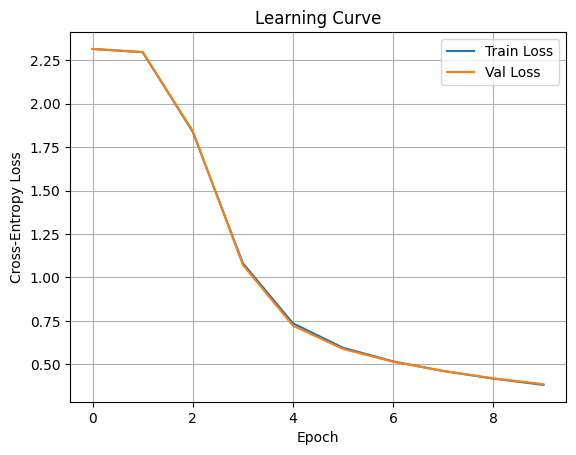

In [3]:
model.plot_learning_curve()


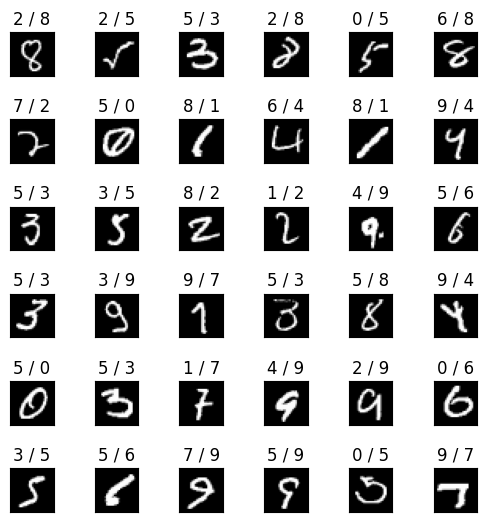

In [4]:
#Problem 8 (Advance Assignment) Confirmation of Misclassification
def show_misclassified(y_pred, y_val, X_val, num=36):
    true_false = y_pred == y_val
    false_list = np.where(true_false == False)[0].astype(np.int32)

    if false_list.shape[0] < num:
        num = false_list.shape[0]
    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=0.8, bottom=0, top=0.8, hspace=1, wspace=0.5)

    for i in range(num):
        ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
        ax.set_title(f"{y_pred[false_list[i]]} / {y_val[false_list[i]]}")
        ax.imshow(X_val.reshape(-1, 28, 28)[false_list[i]], cmap="gray")
    plt.show()
show_misclassified(y_pred, y_val, X_val, num=36)
